<a href="https://colab.research.google.com/github/IqraZainab23/AI-201/blob/main/Project_01_hello_gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q langchain_google_genai openai langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 15.0 MB/s eta 0:00:00


In [ ]:
!pip install -q transformers diffusers accelerate

In [ ]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.tools import tool
import openai
from langchain.prompts import PromptTemplate


In [ ]:
first_prompt = PromptTemplate (
    input_variables=["question"],
    template = "change this {question} into  a good image generative prompt "
)
second_prompt = PromptTemplate (
    input_variables=["first_response"],
    template = "read this {first_response} and summarize into two lines promt for image generation ?"
)



In [ ]:
llm = ChatGoogleGenerativeAI(
    api_key= GEMINI_API_KEY,
    model="gemini-1.5-flash",
    temperature =  0.5,
    token = 75)


In [ ]:
first_chain = first_prompt | llm
second_chain = second_prompt | llm


In [ ]:
import torch
from diffusers import StableDiffusionPipeline, StableDiffusion3Pipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Chain processing logic
first_response = first_chain.invoke({"question": input("write an image generation prompt: ")})
print("First Chain:", first_response.content)

second_response = second_chain.invoke({"first_response": first_response.content})
print("Second Chain:", second_response.content)

# Use the processed prompt from the second chain for image generation
prompt = second_response.content

# Load the pre-trained Stable Diffusion model
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")

# Generate the image
print("Generating image with prompt:", prompt)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

# Save and display the image
image.save("output_image.png")
image.show()
print("Image saved as 'output_image.png'")


write an image generation prompt: image of car
First Chain: Please provide the image! I need to see the image of the car to generate a good image generative prompt.  I'll need to consider aspects like:

* **Make and Model:** Is it a classic car, a modern sports car, an SUV, etc.?  Be as specific as possible.
* **Color:** What color is the car?  Include specific shades (e.g., "British Racing Green," "Ferrari Red," "Midnight Blue").
* **Angle:** Is it a front, side, three-quarter, or other view?
* **Setting:** Where is the car located? (e.g., "on a deserted highway," "in a bustling city street," "in a garage").
* **Lighting:** What kind of lighting is present? (e.g., "dramatic sunset lighting," "soft morning light," "neon city lights").
* **Style:** What artistic style should be emulated? (e.g., "photorealistic," "hyperrealistic," "impressionistic," "anime," "cyberpunk").
* **Details:** Any unique features of the car? (e.g., custom rims, specific decals, damage).


Once you provide the i

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image with prompt: Please provide the image of the car.  I need the image to create a prompt.


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as 'output_image.png'


<class 'langchain_core.messages.ai.AIMessage'>


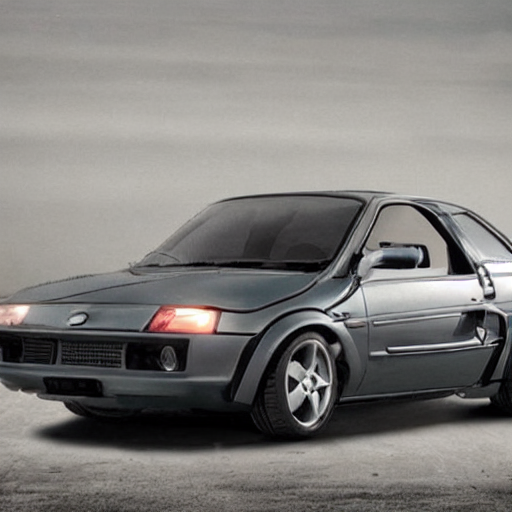

In [ ]:
print(type(first_response))
image